### Understanding the Zip_Code
Brinco De Ouro Da Princessa
Av. Imperatriz Dona Tereza Cristina, 87
Jardim Guarani, Campinas
SP, 13100-200, Brasile


    1 – the first character indicates the region, in our case São Paulo
    3 – the second character indicates the sub-region, Campinas
    1 – the third character indicates the sector, Campinas and surroundings
    0 – the fourth character indicates the sub-sector
    0 – the fifth character indicates the sub-sector divider
    200 – the last three characters indicate the delivery area, respectively the exact address

ref - https://www.europacco.com/en/find-zip/br?country=br

In [1]:
import pandas as pd
import numpy as np
from datetime import datetime

In [2]:
import sys
import os

from utils import read_orders, read_customers
orders = read_orders()

In [18]:
customers = read_customers()

NameError: name 'read_customers' is not defined

In [3]:
orders['order_status'].value_counts()

order_status
delivered      96478
shipped         1107
canceled         625
unavailable      609
invoiced         314
processing       301
created            5
approved           2
Name: count, dtype: int64

In [7]:
delivered = orders[orders['order_status'] == 'delivered']
delivered = orders[orders['total_delivery_time'].notnull()]

In [8]:
delivered.isnull().sum()

order_id                          0
customer_id                       0
order_status                      0
order_purchase_timestamp          0
order_approved_at                14
order_delivered_carrier_date      1
order_delivered_customer_date     0
order_estimated_delivery_date     0
total_delivery_time               0
estimated_delivery_time           0
wait_approve_time                14
seller_to_logistic_time          15
logistic_to_customer_time         1
dtype: int64

In [14]:
orders.describe()

,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,total_delivery_time,estimated_delivery_time,wait_approve_time,seller_to_logistic_time,logistic_to_customer_time,total_hours
count,99441,99281,97658,96476,99441,96476,99441,99281,97644,96475,96476.000000
mean,2017-12-31 08:43:12.776581120,2017-12-31 18:35:24.098800128,2018-01-04 21:49:48.138278656,2018-01-14 12:09:19.035542272,2018-01-24 03:08:37.730111232,12 days 13:24:31.879068369,23 days 18:25:24.953530234,0 days 10:25:08.739486910,2 days 19:19:15.298850927,9 days 07:55:59.254148743,301.408855
min,2016-09-04 21:15:19,2016-09-15 12:16:38,2016-10-08 10:34:01,2016-10-11 13:46:32,2016-09-30 00:00:00,0 days 12:48:07,1 days 15:34:33,0 days 00:00:00,-172 days +18:44:38,-17 days +21:41:31,12.801944
25%,2017-09-12 14:46:19,2017-09-12 23:24:16,2017-09-15 22:28:50.249999872,2017-09-25 22:07:22.249999872,2017-10-03 00:00:00,6 days 18:23:37.250000,18 days 07:57:38,0 days 00:12:54,0 days 21:00:44,4 days 02:23:55.500000,162.393681
50%,2018-01-18 23:04:36,2018-01-19 11:36:13,2018-01-24 16:10:58,2018-02-02 19:28:10.500000,2018-02-15 00:00:00,10 days 05:13:34,23 days 05:46:08,0 days 00:20:36,1 days 19:38:29.500000,7 days 02:23:40,245.226111
75%,2018-05-04 15:42:16,2018-05-04 20:35:10,2018-05-08 13:37:45,2018-05-15 22:48:52.249999872,2018-05-25 00:00:00,15 days 17:17:16.250000,28 days 10:11:48,0 days 14:34:51,3 days 13:55:52.500000,12 days 00:41:55.500000,377.287847
max,2018-10-17 17:30:18,2018-09-03 17:40:06,2018-09-11 19:48:28,2018-10-17 13:22:46,2018-11-12 00:00:00,209 days 15:05:12,155 days 03:15:04,187 days 21:10:50,125 days 18:18:06,205 days 04:35:00,5031.086667
std,NaN,NaN,NaN,NaN,NaN,9 days 13:07:00.181125305,8 days 19:58:36.884044268,1 days 02:02:16.813098347,3 days 13:11:10.497083683,8 days 18:14:34.522067763,229.116717


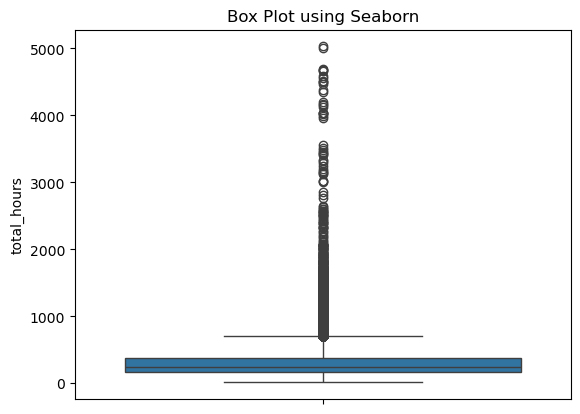

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

orders['total_hours'] = orders['total_delivery_time'].dt.total_seconds() / 3600.0
# Create a box plot grouping data by day of the week
sns.boxplot(y='total_hours', data=orders)
plt.title('Box Plot using Seaborn')
plt.show()


In [15]:
Q3 = 377.29
Q1 = 162.39
upper_fence = Q3 + (1.5 * (Q3 - Q1))
upper_fence

699.6400000000001

In [16]:
outliers = orders[orders['total_hours'] > upper_fence]

In [17]:
outliers.shape

(4899, 14)

In [5]:
outliers['

dtype('<m8[ns]')

In [6]:
orders['order_status'].value_counts()

order_status
delivered      96478
shipped         1107
canceled         625
unavailable      609
invoiced         314
processing       301
created            5
approved           2
Name: count, dtype: int64

In [7]:
orders['total_delivery_time'].dt.days

0         8.0
1        13.0
2         9.0
3        13.0
4         2.0
         ... 
99436     8.0
99437    22.0
99438    24.0
99439    17.0
99440     7.0
Name: total_delivery_time, Length: 99441, dtype: float64

In [8]:
total_hours = orders['total_delivery_time'].dt.total_seconds() / 3600.0
total_hours.head()

0    202.477778
1    330.768889
2    225.461111
3    317.010000
4     68.973056
Name: total_delivery_time, dtype: float64